# \[Ex-01\]가위바위보 분류기 만들기 
0~9까지 손글씨 이미지 총 10개의 클래스(class) 인식 후 **분류 문제** 

실습할 내용은 이미지를 보고 가위바위보 총 3개의 클래스를 **분류** 하는 문제 

일반적인 딥러닝 기술은 **데이터 준비 → 딥러닝 네트워크 설계 → 학습 → 테스트(평가)** 순이다.



## 데이터 준비하기
### 데이터 가져와서 변수에 저장하기


In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)   # Tensorflow의 버전을 출력

mnist = keras.datasets.mnist

# tensorflow_datasets 의 이름으로 저장된 폴더에 저장 된다. 
# 이진 파일로 저장된다. 

# MNIST 데이터를 로드. 다운로드하지 않았다면 다운로드까지 자동으로 진행됩니다. 
(x_train, y_train), (x_test, y_test) = mnist.load_data()   
# x= 이미지 y= 라벨 

print(len(x_train))  # x_train 배열의 크기를 출력
print(len(x_test)) # Test 데이터의 개수 

2.5.0
60000
10000


In [12]:
print(x_train.shape,': x_train의 배열크기', y_train.shape,': y_train의 배열') # 배열의 크기 
print(x_train.ndim,': x_train의 축 개수', y_train.ndim,': y_train의 축 개수') # 축의 개수 
print(x_train.dtype) # 데이터 타입 

(60000, 28, 28) : x_train의 배열크기 (60000,) : y_train의 배열
3 : x_train의 축 개수 1 : y_train의 축 개수
uint8


#### keras.datasets.minist 는 keras에서 데이터를 가져오는 코드 

[Minist 데이터 셋 설명 및 다운로드](
http://yann.lecun.com/exdb/mnist/)


[Mnist TensorFlow 데이터셋 받는곳](https://www.tensorflow.org/datasets/catalog/mnist)

#### 학습용 데이터와 시험용 데이터 가져오기 
```
(x_train, y_train), (x_test, y_test) = mnist.load_data()
```
mnist.load_data() 함수를 통해 학습용 데이터 (x_train, y_train)와 시험용 데이터 (x_test, y_test)를 나누어서 받아들이는 것을 볼 수 있다.




### 데이터 이미지로 확인하기 

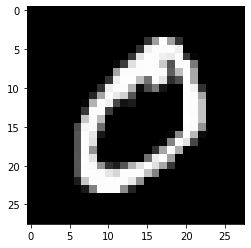

1 번째 이미지의 숫자는 바로  0 입니다.


In [7]:
# index에 0에서 59999 사이 숫자를 지정해 보세요.
index=1
plt.imshow(x_train[index],cmap='plt.cm.binary') # index 변수에 담긴 숫자번째 이미지 출력 
# cmap : 색 변환 
# cmap = 'gray'
plt.show() # imshow를 보여준다. 

print( (index+0), '번째 이미지의 숫자는 바로 ',  y_train[index], '입니다.')

### Matplotlib 이란?
- 파이썬에서 제공하는 시각화(Visualization) 패키지인 Matplotlib은 차트(chart), 플롯(plot) 등 다양한 형태로 데이터를 시각화할 수 있는 강력한 기능을 제공합니다.

[https://matplotlib.org/2.0.2/gallery.html](Matplotlib 활용 사례)

학습데이터와 라벨 
<img src="E-1-4.max-800x600.jpg" alt="Prunus" title="A Wild Cherry (Prunus avium) in flower">





In [7]:
print(x_train.shape) # train
print(x_test.shape) # test 

# (개수, 너비, 높이)

(60000, 28, 28)
(10000, 28, 28)


[데이터셋 이야기](https://tykimos.github.io/2017/03/25/Dataset_and_Fit_Talk/)

- 위 블로그에서 조기종료 부분에서 값이 튀었을 때 조기종료 하는 코드 알아보기 ???

### 데이터 전처리 하기 
숫자 손글씨 이미지의 실제 픽셀 값은 0\~255 사이의 값을 가집니다. 
일반적으로 입력은 0\~1 사이의 값으로 정규화 시켜주는 것이 좋습니다. 

위의 정규화하는 과정은 왜 하는가? 

https://dryjelly.tistory.com/145

In [8]:
print('최소값:',np.min(x_train), ' 최대값:',np.max(x_train))

최소값: 0  최대값: 255


In [9]:
x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0
print('최소값:',np.min(x_train_norm), ' 최대값:',np.max(x_train_norm))

최소값: 0.0  최대값: 1.0


## 딥러닝 네트워크 설계하기 

### Sequential Model 사용 하기 

- 위에서 데이터를 가져오고 데이터를 확인 및 정규화를 하였다. 즉, 데이터 준비를 완료 하였다. 
- 딥러닝 네트워크를 만들어야 한다. 이번 수업에서는 텐서플로우 케라스에서 Sequential API 라는 방법을 사용 

### Sequential API
- Sequential API는 개발의 자유도는 떨어지지만 간단하게 딥러닝 모델을 만들어 낼 수 있는 방법 

- Functional API 이용하는 방법과 밑바닥 부터 직접 코딩하는 방법 등 여러 방법들이 있다. 

- 이번 시간에는 LeNet이라는 딥러닝 네트워클르 설계할 것 

### LeNet  

In [13]:
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

Model에 추가된 Layer 개수:  7


<img src="F-1-5.max-800x600.png" alt="Prunus" title="A Wild Cherry (Prunus avium) in flower">

- Conv2D 레이어의 첫 번째 인자는 사용하는 이미지 특징의 수입니다. 
    - 여기서는 16과 32를 사용 
    - 먼저 16개의 이미지 특징을 그 뒤에 32개의 이미지 특징을 고려 하겠다. 
    - 숫자 형태는 가장 단순한 형태, 강아지 얼굴 사진등 복잡한 이미지의 분류 문제라면 특징 숫자를 늘려주는것을 고려해 볼 수 있따. 
    - **하이퍼 파라미터**

- Dense 레이어의 첫 번쨰 인자는 분류기에 사용되는 뉴런의 숫자 
    - 이 값이 클수록 보다 복잡한 분류기를 만들 수 있다. 
    - 10개의 숫자가 아닌 알파벳을 구분하고 싶다면 대문자 26개, 소문자 26개로 총 52개의 클래스를 분류해 내야 합니다. 그래서 32보다 큰 64, 128 등을 고려해 볼 수 있을 것입니다.
    
- 마지막 Dense 레이어의 뉴런 숫자는 결과적으로 분류해 내야 하는 클래스 수로 지정하면 됩니다.
    - 자 인식기에서는 10, 알파벳 인식기에서는 52가 되겠지요.
    
    
- 위 숫자들은 **하이퍼파라미터**로써 결과를 더 좋게 바꿀 수 있는 우리가 변경할 수 있는 값들 입니다. 
    
### 딥러닝 네트워크 모델 확인 메소드 

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                25632     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                3

## 딥러닝 네트워크 학습 시키기 

### 입력 데이터 형태 맞추기 
- 우리가 Sequential API를 이용하여 만든 네트워크의 입력 형태는 (데이터갯수, 이미지 크기 x, 이미지 크기 y, 채널수) 이다. 

- 이전 스텝에서 모델의 첫번째 레이어에서 input_shape=(28,28,1)로 지정햇다.

- 그런데 print(x_train.shape)을 해보면 (60000,28,28)로 채널수에 대한 정보가 없다. 따라서(60000,28,28,1)로 만들어 주어야 한다. 

    - 여기서 채널 수 1은 흑백이미지를 의미한다. 컬러 이미지라면 RGB 세 가지 값을 가지고 있기 때문에 3 이다. 

In [19]:
print("Before Reshape - x_train_norm shape: {}".format(x_train.shape))
print("Before Reshape - x_test_norm shape: {}".format(x_test.shape))

x_train_reshaped=x_train.reshape( -1, 28, 28, 1)  # 데이터갯수에 -1을 쓰면 reshape시 자동계산됩니다.
x_test_reshaped=x_test.reshape( -1, 28, 28, 1)

print("After Reshape - x_train_reshaped shape: {}".format(x_train_reshaped.shape))
print("After Reshape - x_test_reshaped shape: {}".format(x_test_reshaped.shape))

Before Reshape - x_train_norm shape: (60000, 28, 28)
Before Reshape - x_test_norm shape: (10000, 28, 28)
After Reshape - x_train_reshaped shape: (60000, 28, 28, 1)
After Reshape - x_test_reshaped shape: (10000, 28, 28, 1)


### 학습 
위에서 reshape를 써서 채널 수를 추가 해준다. 


이제 데이터가 준비 되었다. 데이터를 모델에 넣어서 학습을 시켜보자

-  epochs=10 은 전체 60,000개의 데이터를 10번 반복 사용해서 학습을 시키라는 뜻입니다

- 물론 model의 입력 정의에 형태를 맞춘 x_train_reshaped가 사용되어야겠죠.

In [21]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_reshaped, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4533 - accuracy: 0.9018
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0834 - accuracy: 0.9760
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0605 - accuracy: 0.9815
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0508 - accuracy: 0.9841
Epoch 5/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0440 - accuracy: 0.9862
Epoch 6/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0366 - accuracy: 0.9887
Epoch 7/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0321 - accuracy: 0.9899
Epoch 8/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0288 - accuracy: 0.9911
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0250 - accuracy: 0.9920
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.024

- epoch 별로 어느 정도 인식 정확도(accuracy)가 올라가는지 확인할 수 있습니다.
- 인식 정확도가 0.9413에서 0.9957까지 매우 높게 올라가는군요. 
- 9 epoch정도부터는 인식률의 상승이 미미합니다. 10 epoch정도 학습을 시키면 충분할 것 같네요.

## 얼마나 잘 만들었는지 확인하기 
### 테스트 데이터로 성능을 확인해 보자 
- 지금 까지는 학습용 데이터를 가지고 구한것 즉, 연습문제를 잘푸는 인공지능을 만든 것 

- 우리가 만든 딥러닝 네트워크는 실제 시험도 잘 볼 수 있는지 확인이 필요하다. 

- 실제 시험용 데이터 (x_test)를 가지고 확인해 보자 

In [22]:
test_loss, test_accuracy = model.evaluate(x_test_reshaped,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

313/313 - 0s - loss: 0.0532 - accuracy: 0.9851
test_loss: 0.053181666880846024 
test_accuracy: 0.9850999712944031


## 어떤 데이터를 잘못 추론 하였을까? 눈으로 확인해 보기 
- 연습 데이터의 정확도 보다 소폭 하락 한것을 볼 수 있다. 

- 위 MNIST 데이터셋 참고문헌을 보시면 학습용 데이터와 시험용 데이터의 손글씨 주인이 다른 것을 알 수 있습니다. 즉, 한 번도 본 적이 없는 필체의 손글씨가 섞여 있을 가능성이 높습니다. 어찌 보면 인식률이 떨어지는 것은 어느 정도 예상 가능한 일이었습니다.

### 메소드
- model.evaluate() 대신 model.predict() 를 사용하면 model이 입력값을 보고 실제로 추론한 확률분포를 출력할 수 있다. 

- 이 함수의 출력값 즉 확률값이 가장 높은 숫자가 바로 model이 추론한 숫자가 된다. 

In [23]:
predicted_result = model.predict(x_test_reshaped)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1) # 추론한 값 중에 제일 큰 값 출력 

idx=0  #1번째 x_test를 살펴보자. 
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

model.predict() 결과 :  [2.6847112e-14 1.4513468e-09 1.0787946e-03 6.9289076e-06 5.6387994e-10
 5.8917385e-11 2.7480705e-16 9.9891436e-01 4.1645123e-10 7.5047177e-09]
model이 추론한 가장 가능성이 높은 결과 :  7
실제 데이터의 라벨 :  7


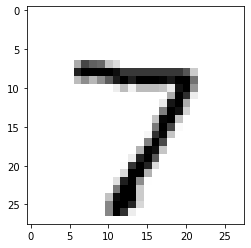

In [24]:
plt.imshow(x_test[idx],cmap=plt.cm.binary)
plt.show()

### 틀린경우만 모아보기 
- 틀린 경우를 살펴 보면 model 또 추론 결과에 대한 확신도가 낮고 매우 혼란스러워 한다는 것을 알 수 있다. 

- model 의 추론 결과를 시각화 하여 살펴보는 것은 향후 model성능 개선에 도움이 되는 아이디어를 얻을 수 있는 방법 중 하나

예측확률분포: [1.4972287e-14 2.4270659e-09 9.8935241e-01 3.8997355e-04 8.4566322e-13
 2.8126302e-11 8.1145688e-16 1.0257619e-02 8.8730797e-13 5.2271474e-14]
라벨: 3, 예측결과: 2


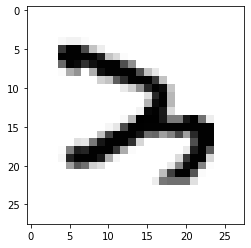

예측확률분포: [5.5801461e-11 2.3019588e-12 1.7563059e-08 4.5917466e-01 1.0742322e-13
 7.3120952e-02 2.2432944e-10 1.6424911e-10 8.9568067e-03 4.5874757e-01]
라벨: 5, 예측결과: 3


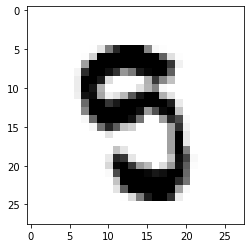

예측확률분포: [1.0333649e-05 1.9348044e-02 2.5573539e-07 1.5058408e-06 9.3325652e-02
 6.1259789e-11 1.0520701e-09 4.1339153e-01 2.7976202e-07 4.7392249e-01]
라벨: 4, 예측결과: 9


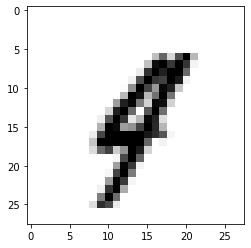

예측확률분포: [2.7929564e-12 1.0734297e-05 2.9062758e-05 3.0520806e-07 5.2798086e-01
 1.3022096e-11 8.2599010e-13 4.7033072e-01 9.6448298e-07 1.6473491e-03]
라벨: 7, 예측결과: 4


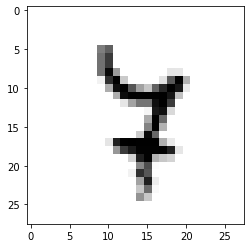

예측확률분포: [4.4170842e-01 2.3119674e-16 6.3344625e-12 2.9869512e-10 3.6883819e-08
 1.8272762e-05 5.5826950e-01 3.2737211e-15 7.7435736e-08 3.7405612e-06]
라벨: 0, 예측결과: 6


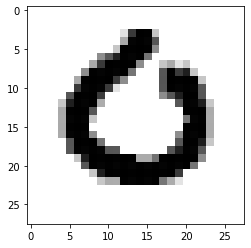

In [26]:
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 5개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

## 더 좋은 네트워크를 만들어 보기 
- 딥러닝 네트워크 모델 구조를 바꾸지 않으면서 간다히 성능을 오리고 싶다면 전 단계의 딥러닝 네트워크 설계에서 본 하이퍼파라미터들을 바꿔 보는 방법이다. 

- 학습 반복 횟수인 Epoch 값을 변경하는 방법도 잇다. 


In [27]:
#바꿔 볼 수 있는 하이퍼파라미터들
n_channel_1=16
n_channel_2=32
n_dense=32
n_train_epoch=10

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train_reshaped, y_train, epochs=n_train_epoch)

# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                25632     
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

mkdir -p : mkdir를 사용하여 하위 디렉토리를 생성할때 차례대로 만들지 않고 중간 디렉토리 없이 바로 그 다음 하위 디렉토리를 만들게되면 "디렉토리를 생성할 수 없습니다." 라는 메시지가 나오는데, -p 옵션을 주어 생성하게 되면 자동으로 중간 단계의 디렉토리를 생성하면서 그 하위 디렉토리를 생성하게 됩니다.